
# <span style="color:rgb(213,80,0)">Heteroskedasticity: International Trade Data 2.</span>

This file creates Figures 8.12\-8.15.

## Beginning of code

In [1]:
load inttrade1.mat
% This dataset refers to 'POD_4801000000_CH_IT
X=inttrade1.Weight;
y=inttrade1.Value;
prin=0;
close all
X=X./max(X);
Z=log(X);
n=length(y);

## Create Figure 8.12


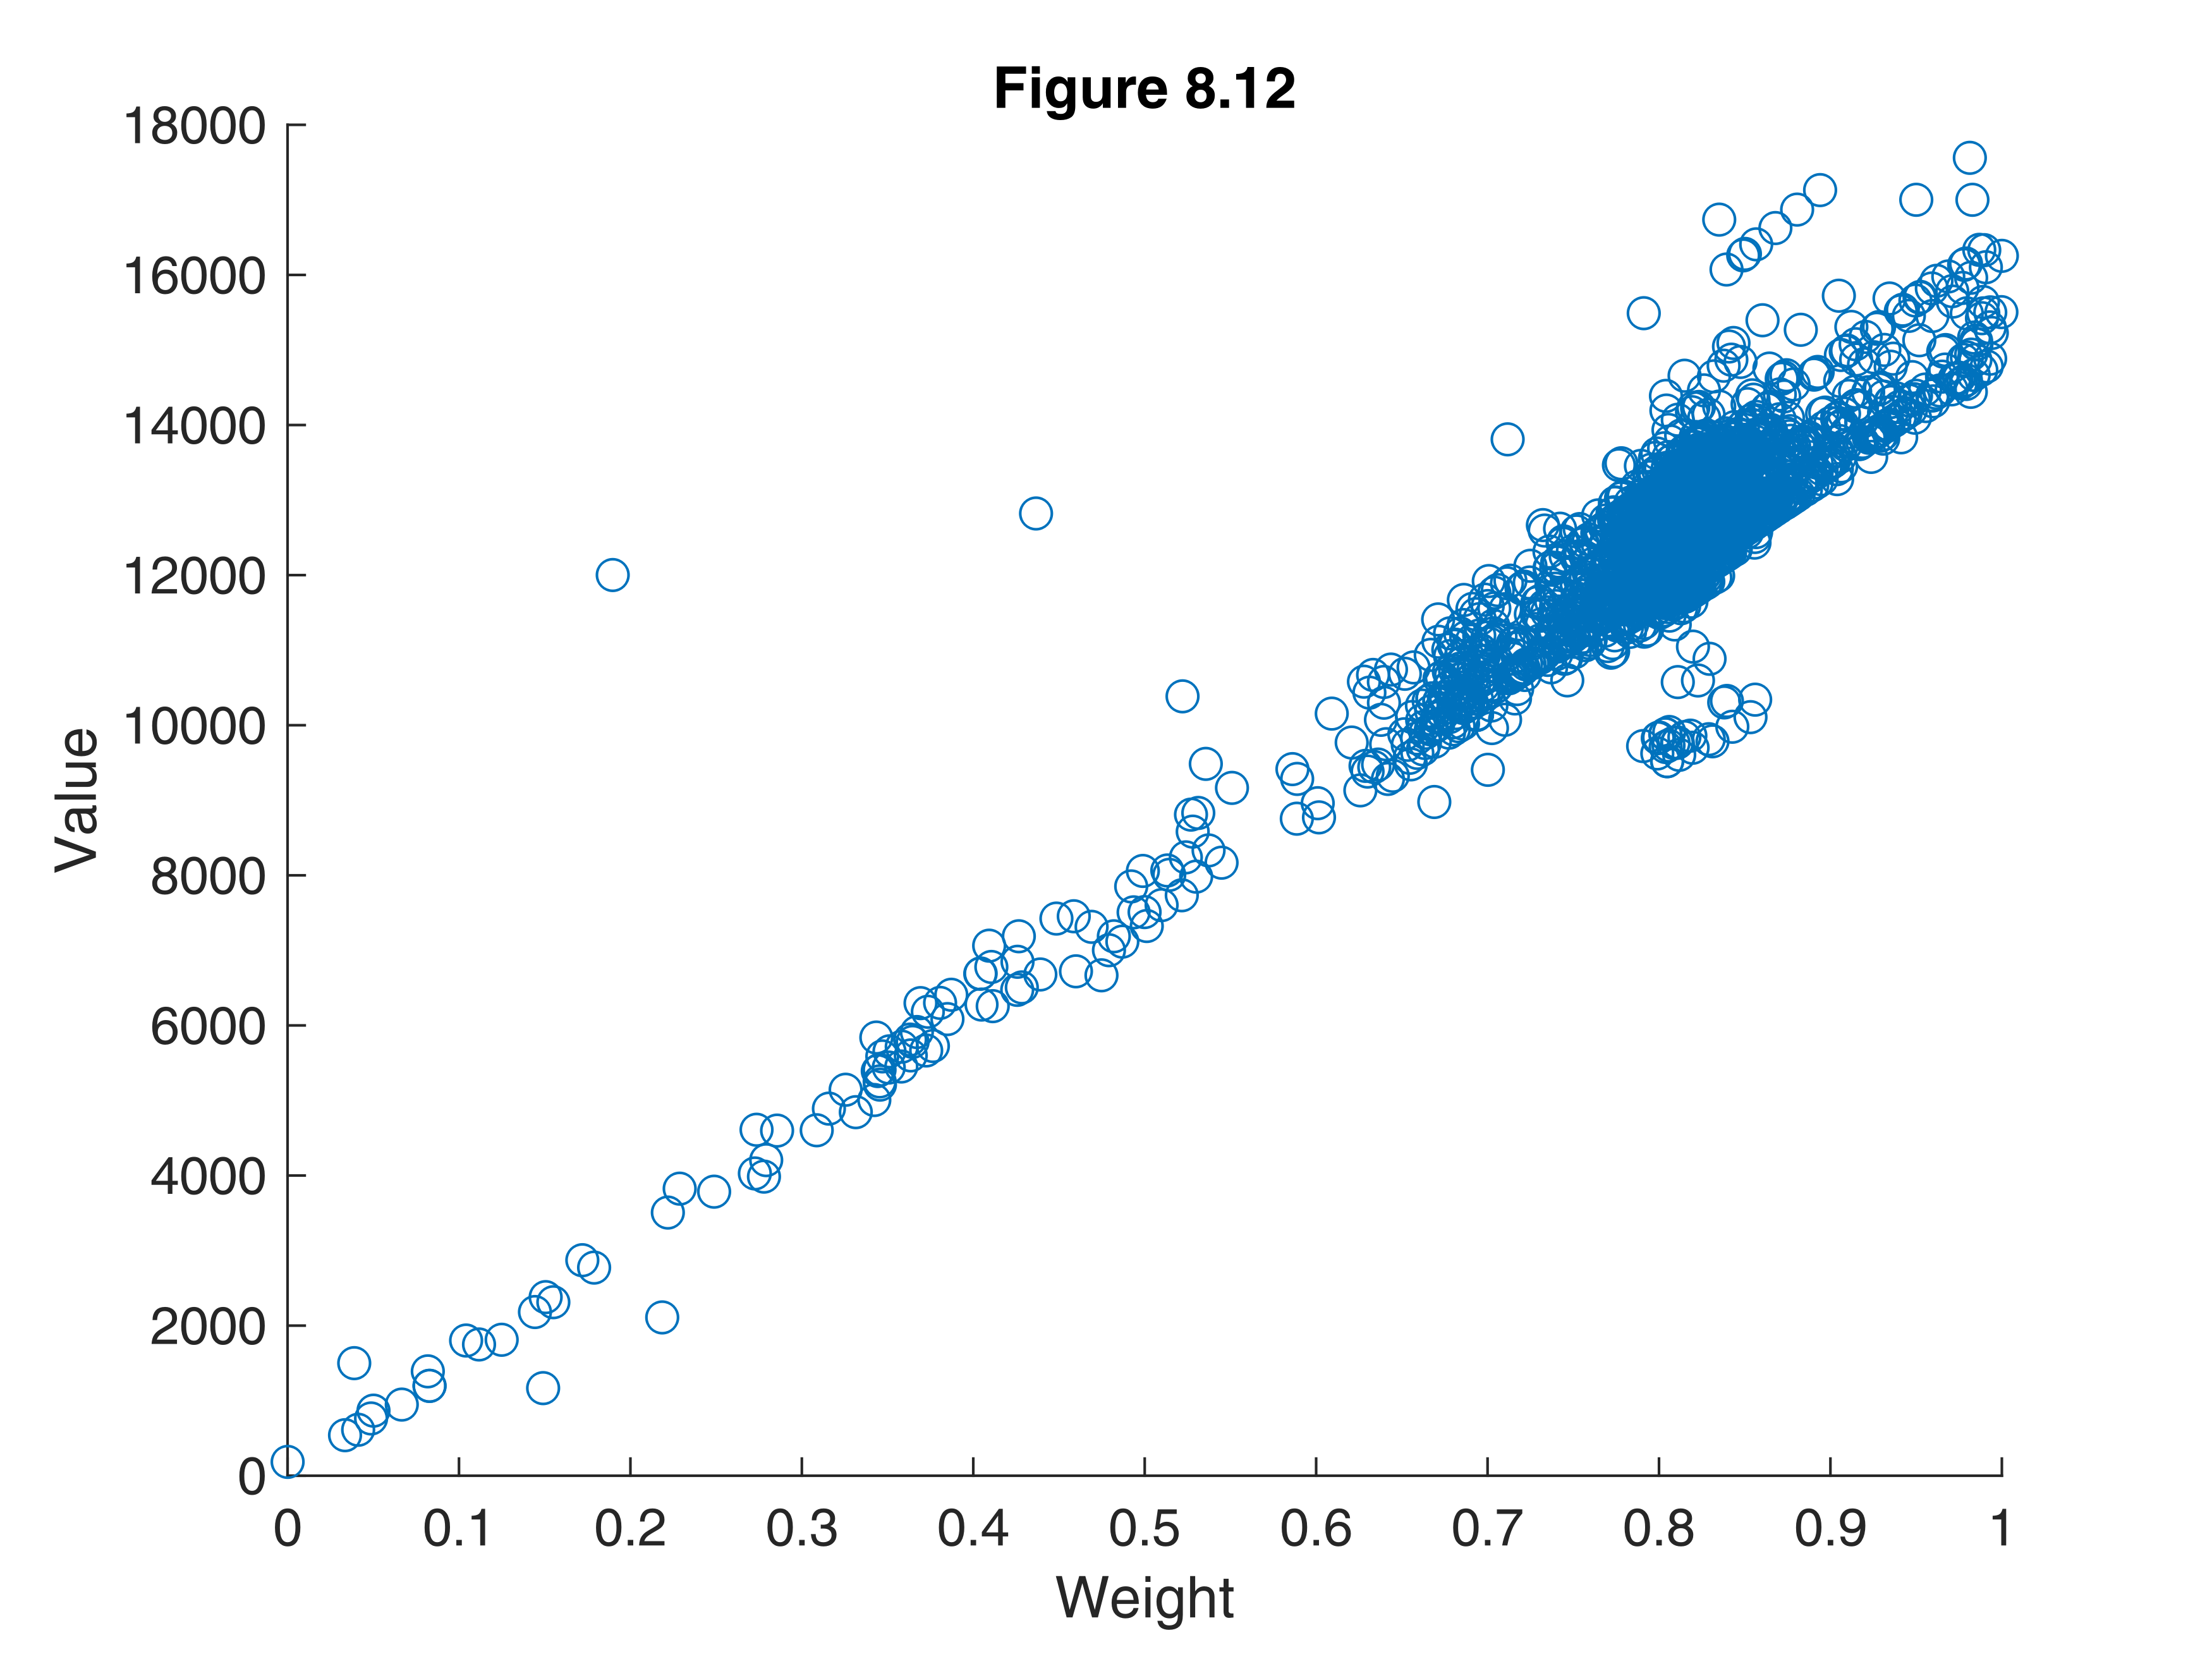

In [2]:
scatter(X,y)
ylabel('Value')
xlabel('Weight')
if prin==1
    print -depsc P48scatter.eps;
else
    set(gcf,'Name', 'Figure 8.12');
    title('Figure 8.12')
end

## Preapare input for Figures 8.13 and 8.14

In [3]:
typeH='art';
% typeH='har';
[outLXS]=LXS(y,X,'nsamp',1000);

Total estimated time to complete LMS:  0.23 seconds

In [4]:
outHEDA=FSRHeda(y,X,Z,outLXS.bs,'init',round(0.7*length(y)),'typeH',typeH);

m=100
m=200
m=300
m=400
m=500
m=600
m=700
m=800
m=900
m=1000
m=1100
m=1200
m=1300
m=1400
m=1500
m=1600
m=1700
m=1800
m=1900
m=2000
m=2100
m=2200
m=2300
m=2400
m=2500
m=2600
m=2700
m=2800
m=2900
m=3000
m=3100
m=3200
m=3300
m=3400
m=3500
m=3600
m=3700
m=3800

## Create Figure 8.13

Monitoring parameter estimates


In [5]:
nr=3; nc=1;
figure
subplot(nr,nc,1)
plot(outHEDA.Hetero(:,1),outHEDA.Hetero(:,2))
xlabel('Subset size m')
kk=20;
xlim([outHEDA.Hetero(1,1) outHEDA.Hetero(end,1)+kk])
title('\alpha')
subplot(nr,nc,2)
plot(outHEDA.Hetero(:,1),log(outHEDA.Hetero(:,3)))


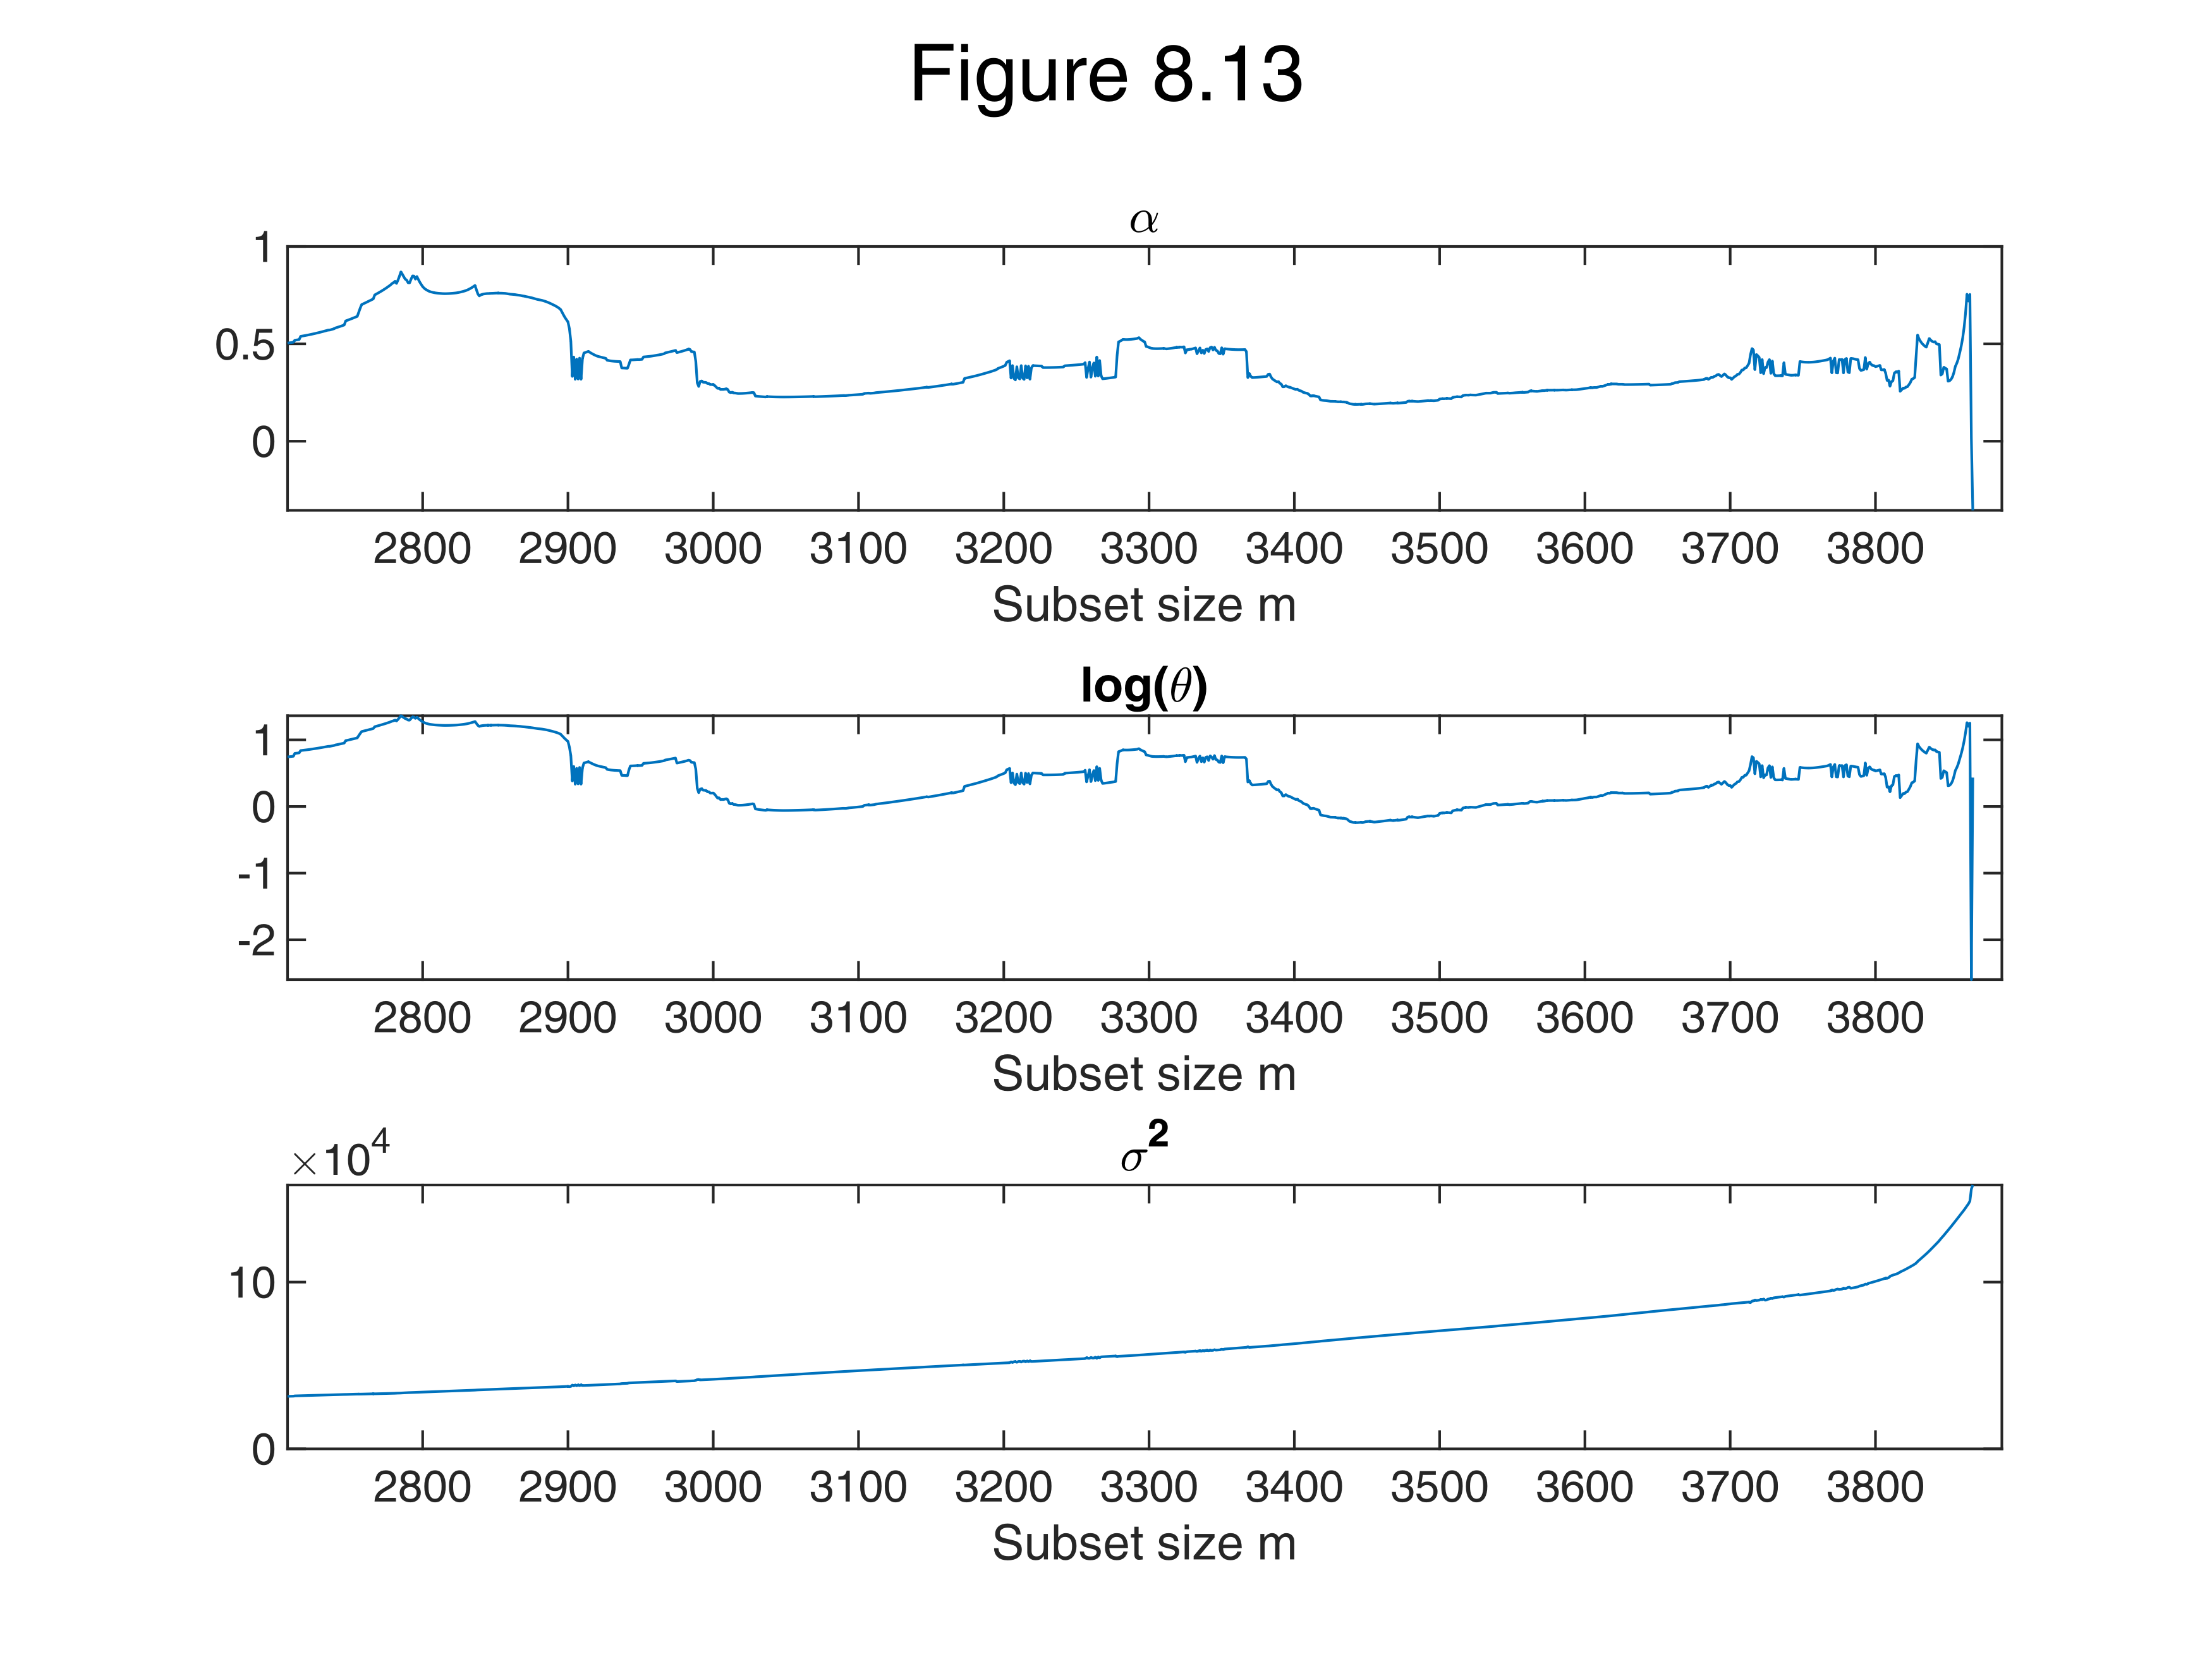

In [6]:
title('log(\theta)')
xlim([outHEDA.Hetero(1,1) outHEDA.Hetero(end,1)+kk])
% ylim([9 14])
xlabel('Subset size m')
subplot(nr,nc,3)
plot(outHEDA.S2(:,1),outHEDA.S2(:,2))
xlim([outHEDA.Hetero(1,1) outHEDA.Hetero(end,1)+kk])
% ylim([0 2000])
title('\sigma^2')
xlabel('Subset size m')
if prin==1
    print -depsc P48param.eps;
else
    set(gcf,'Name', 'Figure 8.13');
    sgtitle('Figure 8.13')
end

## Create Figure 8.14

Monitoring residuals



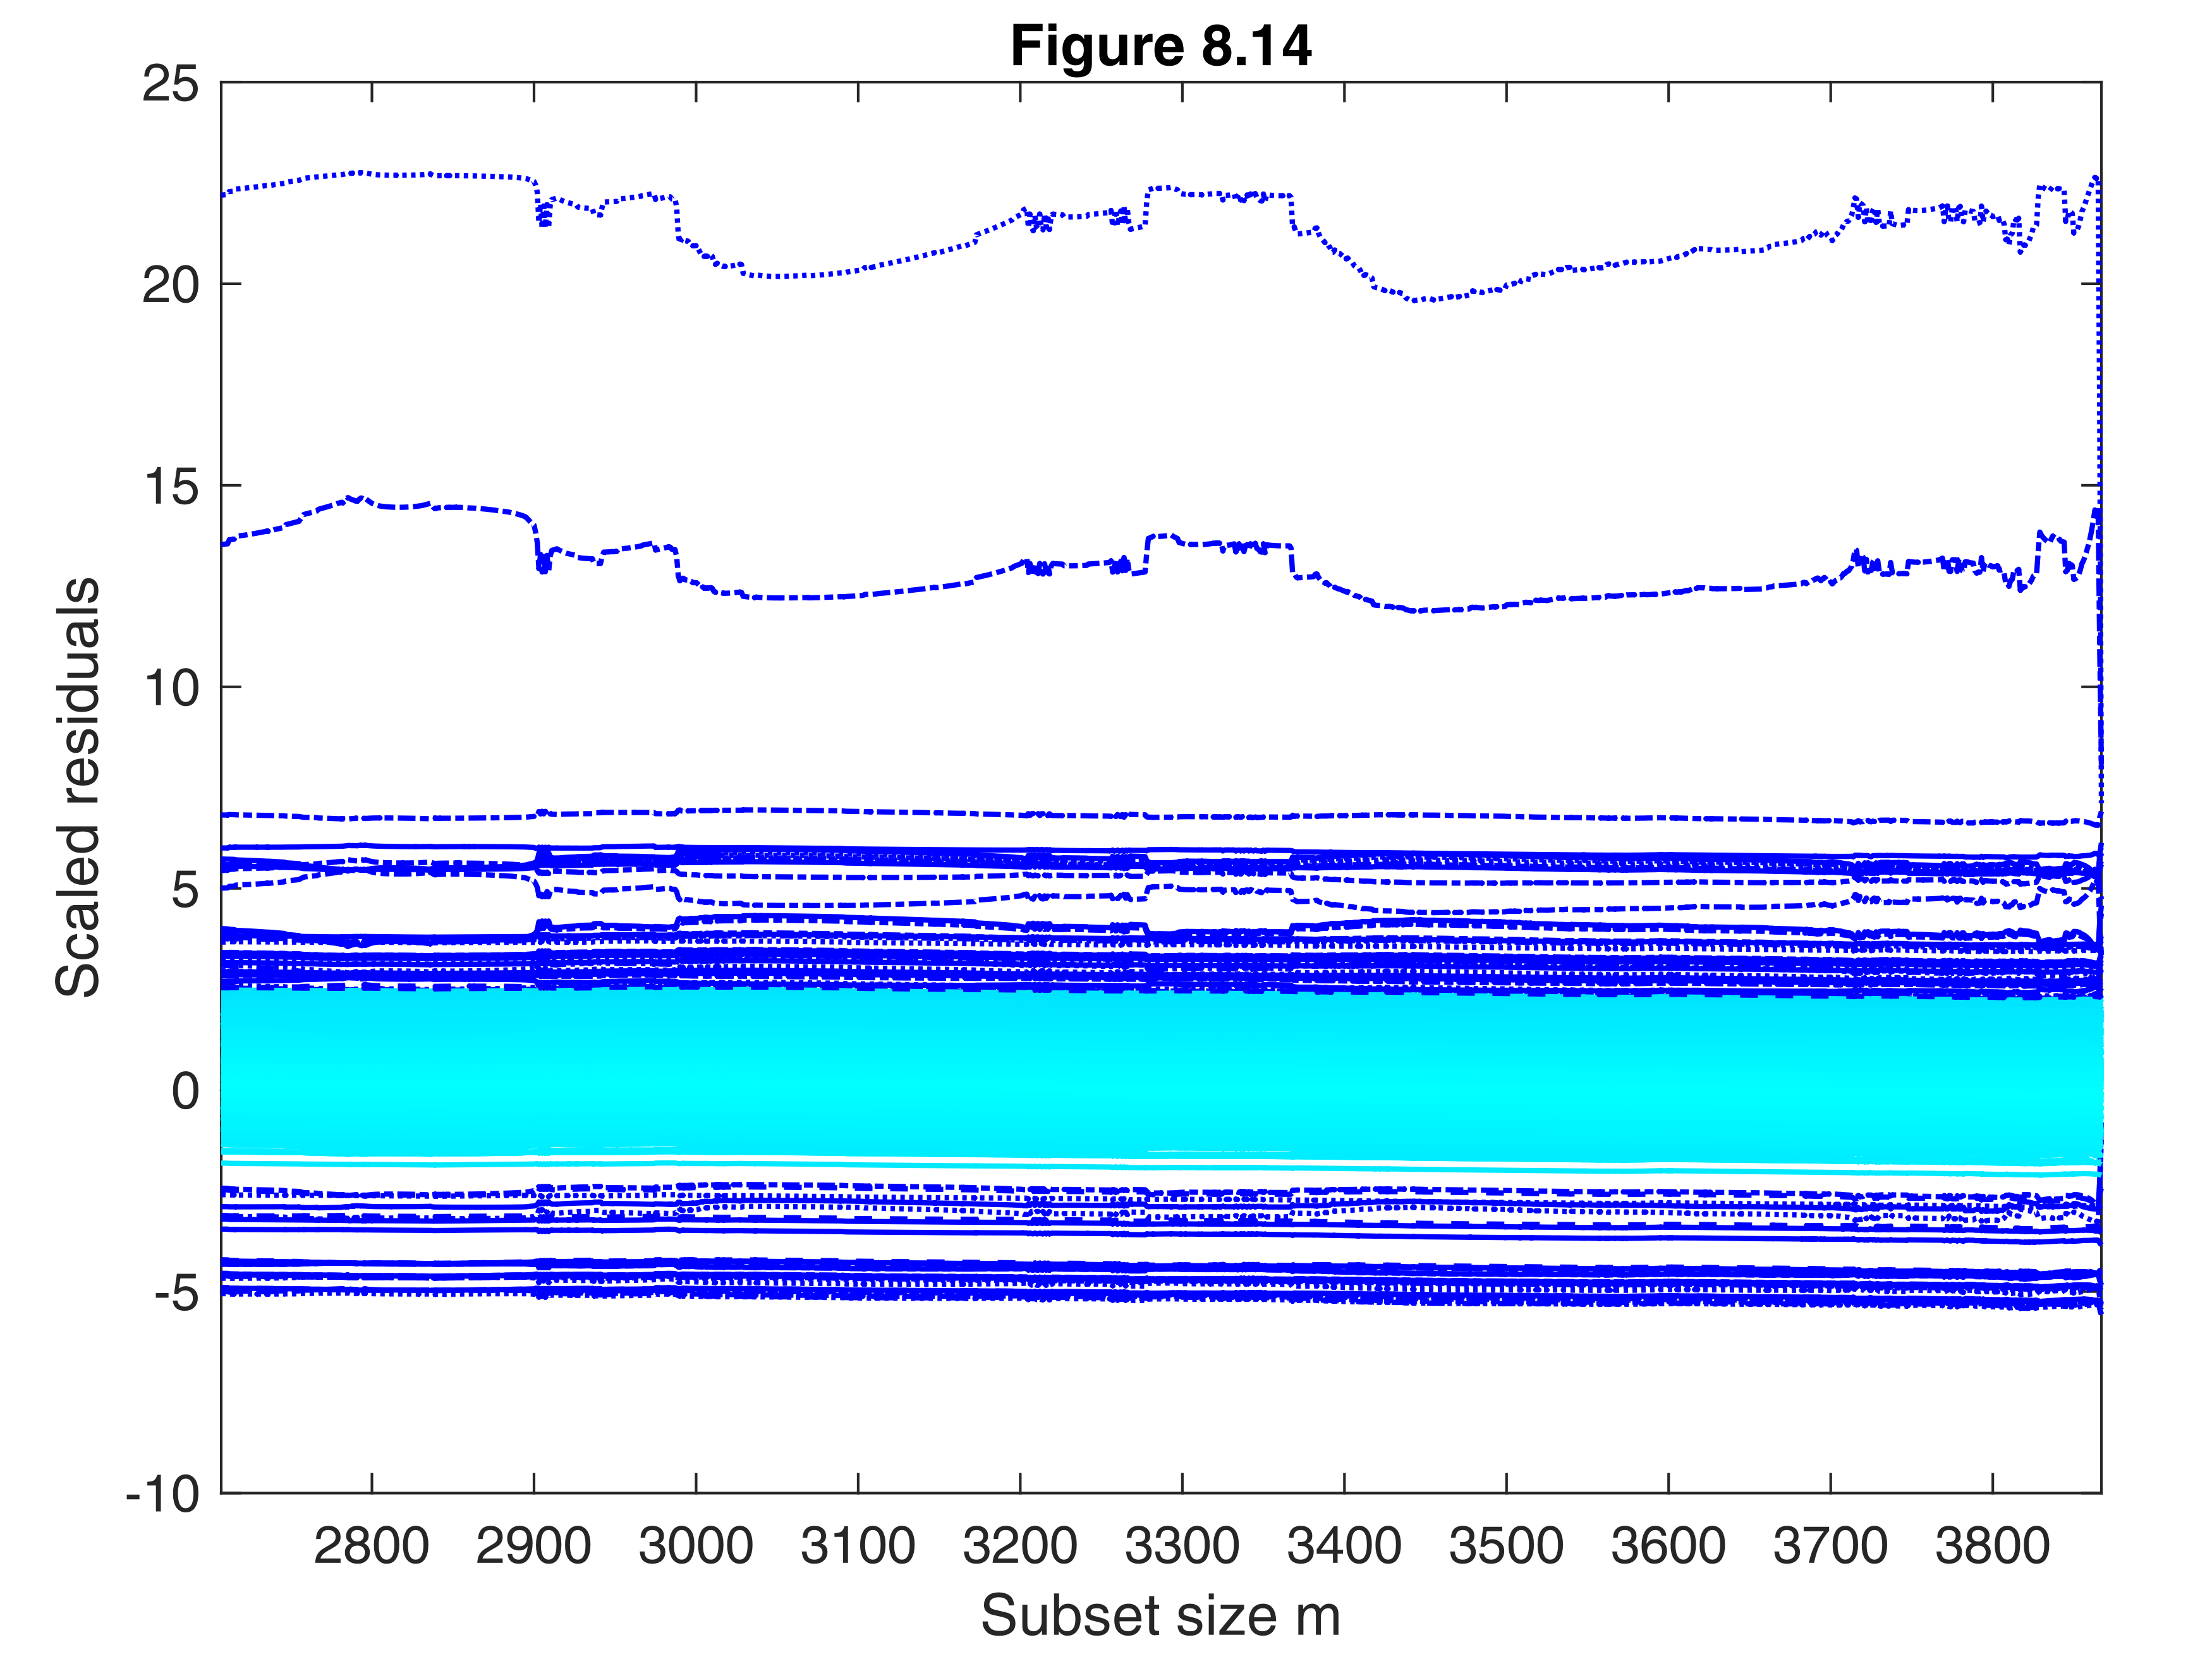

In [7]:
resfwdplot(outHEDA,'datatooltip','')
if prin==1
    print -depsc P48resfwd.eps;
else
    set(gcf,'Name', 'Figure 8.14');
    title('Figure 8.14')
end

## Prepare input for Figure 8.15

Automatic outlier detection


In [8]:
bonflev=0.99;
outH=FSRH(y,X,Z,'init',round(n*0.8),'plots',0,'ylim',[1.6 3], ...
    'typeH',typeH,'bonflev',bonflev);

Total estimated time to complete LMS:  0.09 seconds 
-------------------------
Signal detection loop
mdr(3829,3867)>99% Bonferroni level
----------------------------
Final output
Number of units declared as outliers=38

In [9]:
outl=[outH.ListOut];
bsb=1:n;
bsb(outl)=[];

## Create Figure 8.15

Forecasts with confidence bands



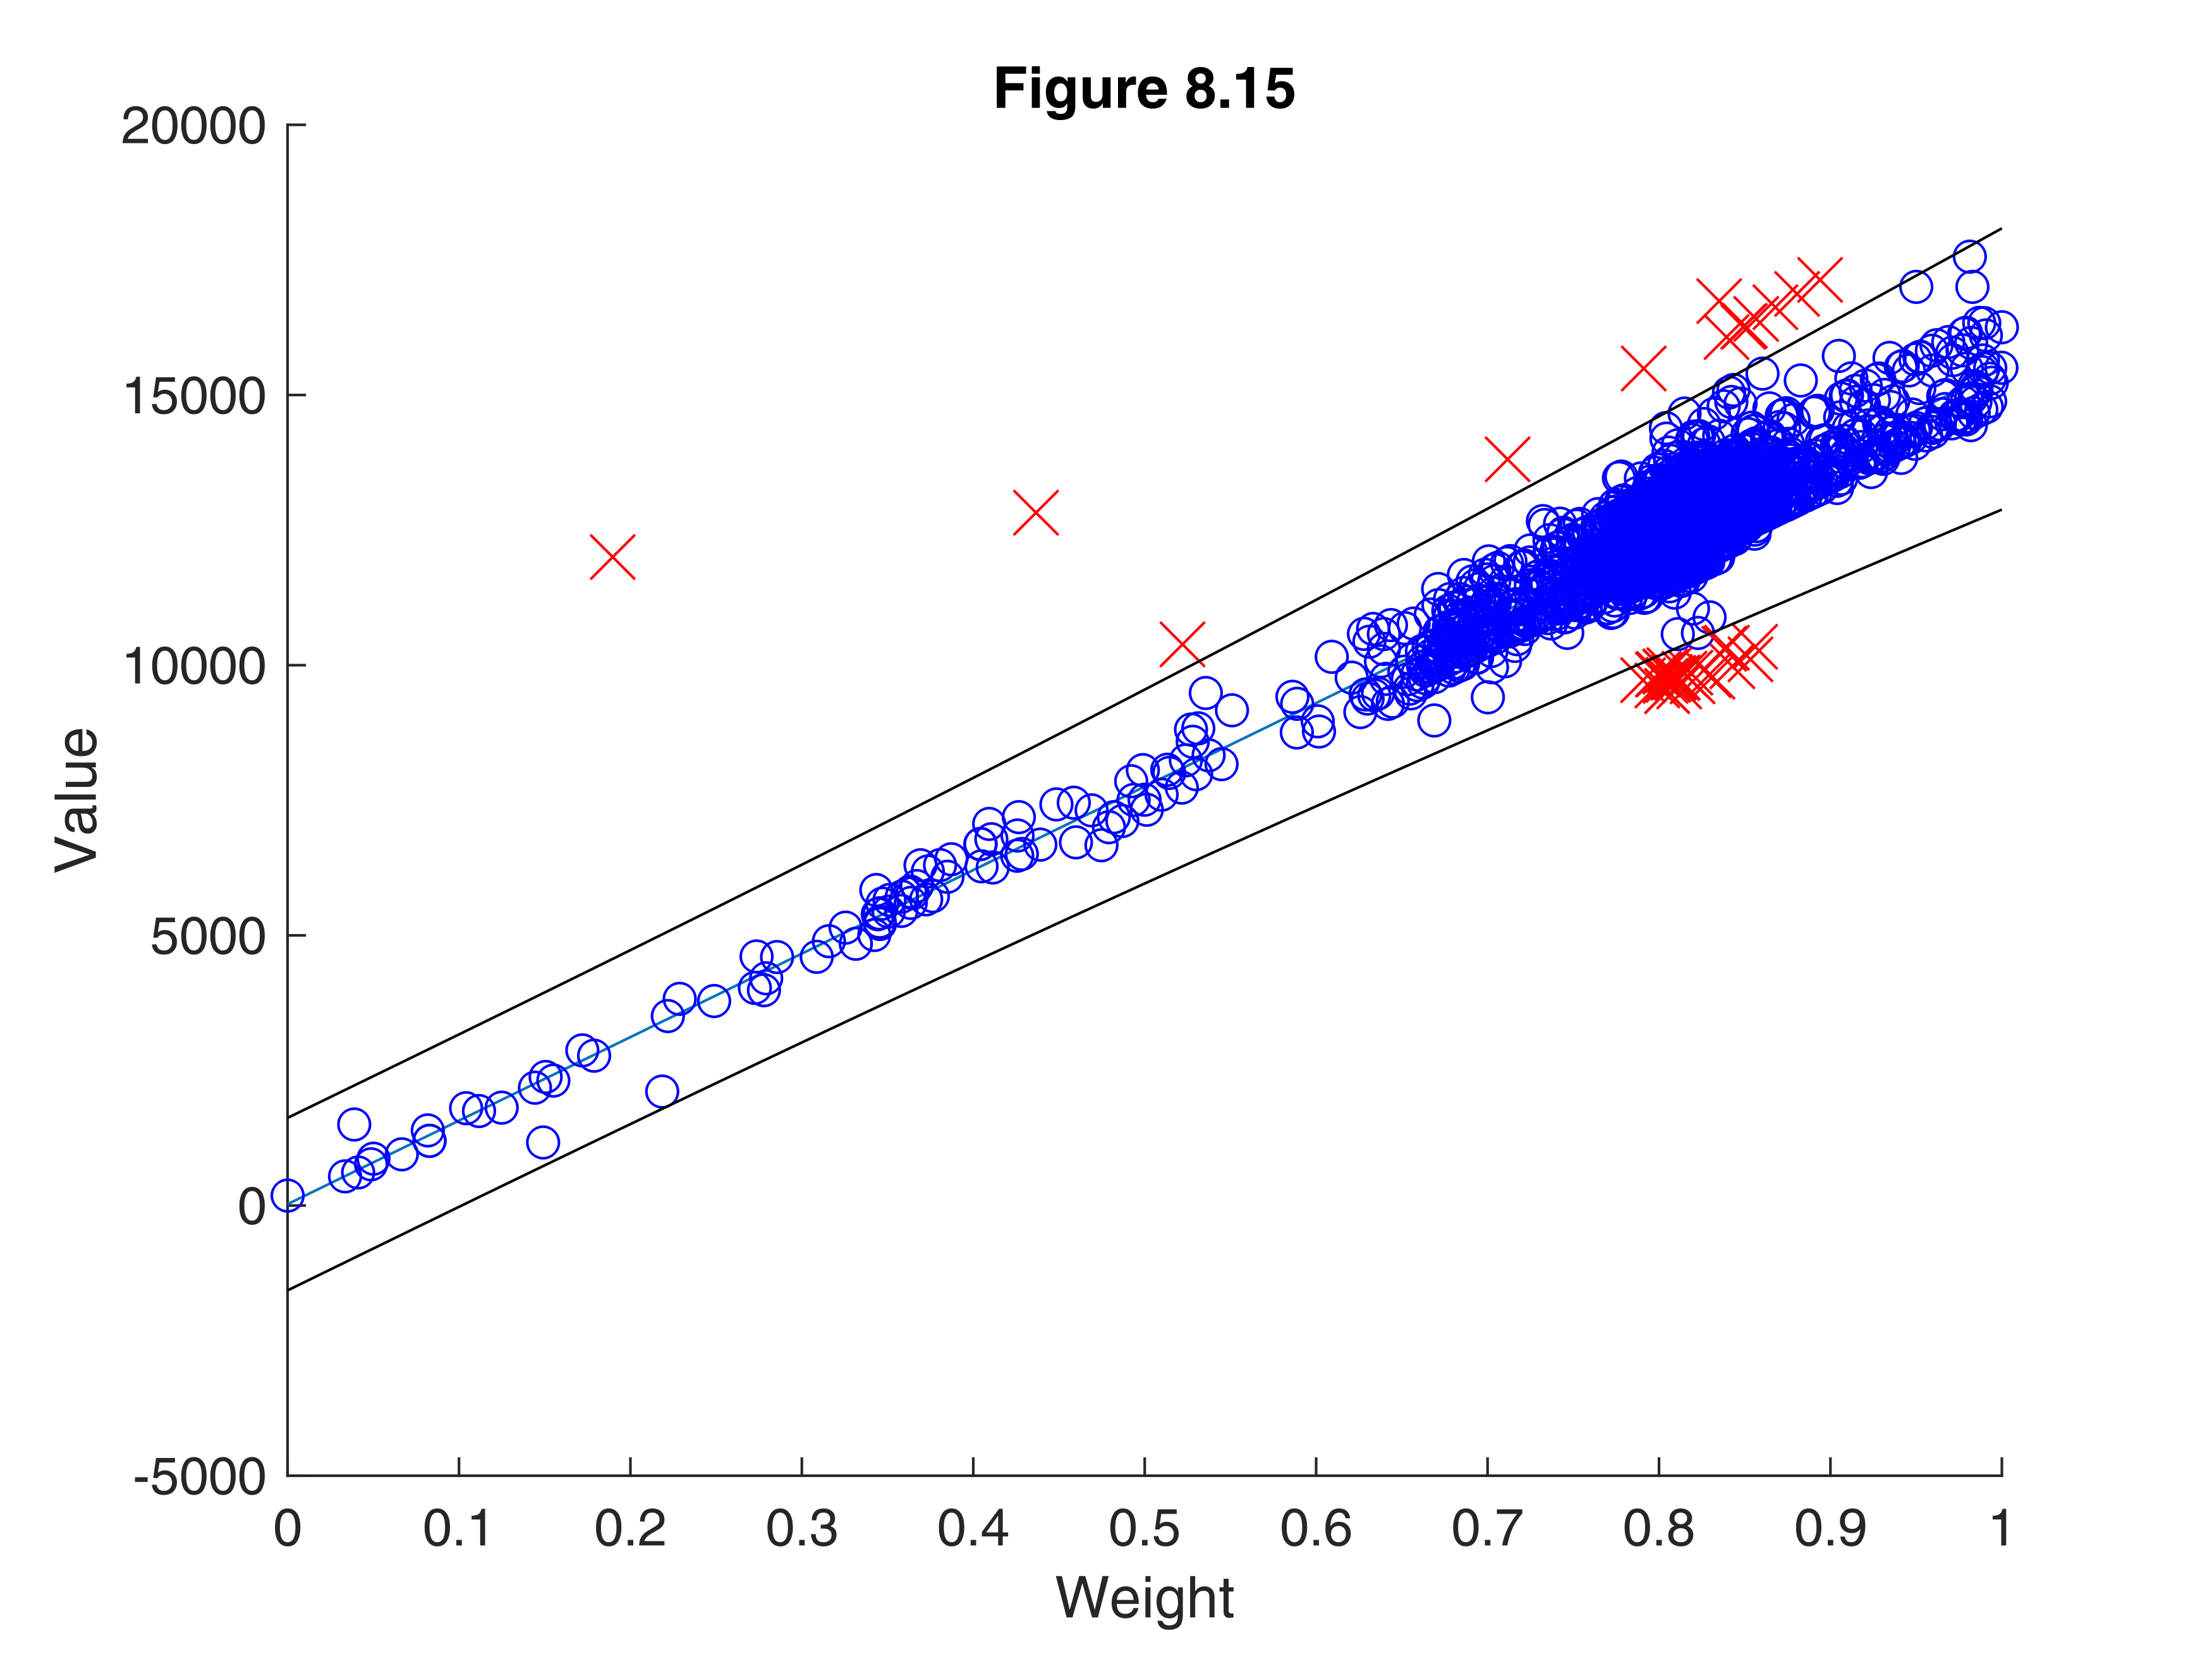

In [10]:
figure
forecastH(y,X,Z,'outH',outHEDA,'bsb',bsb,'conflev',1-0.01/n);
% scatter(X,y)
title('')
ylabel(typeH)
ylabel('Value')
xlabel('Weight')
if prin==1
    print -depsc P48bandsHhar.eps;
    print -depsc P48bandsH.eps;
    print -depsc P48scatterwithouthar.eps;
else
    set(gcf,'Name', 'Figure 8.15');
    title('Figure 8.15')
end

In [11]:

%InsideREADME